In [1]:
!pip install --upgrade pip
!pip install ultralytics google-cloud-storage opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 27.2 MB/s eta 0:00:00


In [3]:
import os
import zipfile

dataset_path = "/content/fdd_defects.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [5]:
from ultralytics import YOLO

model = YOLO("yolov10x.pt")

results = model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0
)

results[0].plot_loss()

Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40442MiB)
engine/trainer: task=detect, mode=train, model=yolov10x.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 13.2MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1    213120  ultralytics.nn.modules.block.SCDown          [320, 640, 3, 2]              
  6                  -1  6   4604160  ultralytics.nn.modules.block.C2fCIB          [640, 640, 6, True]           
  7                  -1  1    417920  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.3MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 990 images, 3 backgrounds, 19 corrupt: 100%|██████████| 990/990 [00:00<00:00, 1145.64it/s]

train: WARNING ⚠️ /content/dataset/train/images/doublepicks_out0006_jpg.rf.9e5bcbe95c143dbe9bd35de11fe7e6af.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0031]
train: WARNING ⚠️ /content/dataset/train/images/doublepicks_out0008_jpg.rf.404187ba5b80d88c04c4880d8c272697.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0083]
train: WARNING ⚠️ /content/dataset/train/images/doublepicks_out0008_jpg.rf.800b11ba0bce185f749aa0cbb488f2de.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0032]
train: WARNING ⚠️ /content/dataset/train/images/doublepicks_out0009_jpg.rf.8eeefe86e606f5377a70318b019c1f32.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0053]
train: WARNING ⚠️ /content/dataset/train/images/doublepicks_out0009_jpg.rf.a57a03b3d9e0d3b2f0a71107ab03daad.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<00:00, 782.95it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 185 weight(decay=0.0), 198 weight(decay=0.0005), 197 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.16G       4.93      10.37      4.114          4        640: 100%|██████████| 122/122 [00:26<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all         66        194      0.428       0.41      0.394      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.2G      4.536      5.781      3.892         11        640: 100%|██████████| 122/122 [00:24<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.20it/s]


                   all         66        194      0.622      0.411      0.367      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.2G      4.482      5.363      3.847         17        640: 100%|██████████| 122/122 [00:23<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.33it/s]


                   all         66        194      0.423      0.703      0.514      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.2G      4.371      4.733       3.77         14        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.37it/s]


                   all         66        194      0.534      0.611      0.618      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.2G      4.181      4.126        3.6         11        640: 100%|██████████| 122/122 [00:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.27it/s]

                   all         66        194      0.556      0.701      0.675      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.2G      4.116      3.937      3.556         10        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.24it/s]


                   all         66        194      0.611      0.721      0.696      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.2G      4.037      3.756      3.468         16        640: 100%|██████████| 122/122 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.82it/s]

                   all         66        194      0.629      0.732      0.728      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.2G      3.927      3.535      3.421         13        640: 100%|██████████| 122/122 [00:23<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.25it/s]

                   all         66        194       0.76      0.656      0.769       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.2G      3.949      3.544      3.389          5        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.20it/s]

                   all         66        194      0.851      0.651      0.724      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.2G       3.82      3.248      3.382          8        640: 100%|██████████| 122/122 [00:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.02it/s]

                   all         66        194      0.656      0.801      0.829      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.2G      3.781      3.122      3.227          9        640: 100%|██████████| 122/122 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.38it/s]


                   all         66        194      0.741      0.752      0.767      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.2G      3.719      3.031      3.258          5        640: 100%|██████████| 122/122 [00:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.12it/s]

                   all         66        194      0.738       0.79      0.854      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.2G      3.678      2.885      3.193         12        640: 100%|██████████| 122/122 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.32it/s]


                   all         66        194      0.787      0.812      0.903      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.2G      3.703      2.851       3.22         19        640: 100%|██████████| 122/122 [00:23<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]


                   all         66        194      0.731      0.829      0.878      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.2G      3.525      2.663      3.097         10        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.34it/s]


                   all         66        194      0.836      0.781      0.883      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.2G      3.646       2.72      3.122          4        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.15it/s]

                   all         66        194      0.746      0.844      0.878      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.2G       3.64      2.593      3.138          9        640: 100%|██████████| 122/122 [00:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]

                   all         66        194      0.761      0.857      0.871      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.2G      3.523      2.579      3.118          9        640: 100%|██████████| 122/122 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.34it/s]


                   all         66        194      0.673      0.843      0.822      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.2G      3.546       2.47      3.069         10        640: 100%|██████████| 122/122 [00:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.30it/s]

                   all         66        194      0.736      0.858      0.892      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.2G      3.506       2.45      3.065         10        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.20it/s]


                   all         66        194       0.74      0.899      0.916      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.2G      3.483       2.31      3.083         16        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.36it/s]


                   all         66        194      0.809      0.863      0.882      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.2G      3.527      2.337      3.066         11        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.33it/s]


                   all         66        194      0.788      0.898      0.883       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.2G      3.487       2.26      3.045         12        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.26it/s]

                   all         66        194      0.786      0.894      0.891      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.2G      3.442      2.273       3.04          7        640: 100%|██████████| 122/122 [00:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.23it/s]


                   all         66        194      0.818       0.81      0.896      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.2G      3.401      2.156      2.994          6        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.38it/s]


                   all         66        194      0.811      0.891      0.893      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.2G      3.397      2.158      2.996          5        640: 100%|██████████| 122/122 [00:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.16it/s]

                   all         66        194      0.841      0.892      0.928       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.2G        3.3      2.115      2.976         10        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.38it/s]


                   all         66        194      0.806      0.877      0.905      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.2G      3.378      2.164      3.016         15        640: 100%|██████████| 122/122 [00:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.26it/s]


                   all         66        194      0.803        0.9      0.908      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.2G      3.319      2.103      2.956         15        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.14it/s]

                   all         66        194      0.755      0.931      0.899      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.2G      3.328      2.061      2.965          6        640: 100%|██████████| 122/122 [00:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.33it/s]


                   all         66        194      0.805      0.869      0.891      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.2G      3.273      2.032      2.966         17        640: 100%|██████████| 122/122 [00:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]


                   all         66        194      0.856      0.915      0.942      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.2G      3.212      1.978      2.923         11        640: 100%|██████████| 122/122 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]


                   all         66        194      0.818      0.866      0.906      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.2G      3.216      1.973      2.916          8        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.26it/s]


                   all         66        194      0.856      0.897      0.924      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.2G      3.183      1.897       2.86         14        640: 100%|██████████| 122/122 [00:23<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.32it/s]


                   all         66        194      0.852      0.895      0.929      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.2G      3.213      1.861      2.863          6        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.38it/s]


                   all         66        194      0.848      0.876      0.933      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.2G      3.123      1.883      2.879          7        640: 100%|██████████| 122/122 [00:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.22it/s]


                   all         66        194      0.859      0.909      0.938      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.2G      3.143      1.887      2.826          5        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.31it/s]


                   all         66        194      0.821      0.919      0.931      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.2G      3.144      1.803      2.805         11        640: 100%|██████████| 122/122 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.34it/s]


                   all         66        194      0.825      0.927       0.93      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.2G      3.052      1.777      2.812          7        640: 100%|██████████| 122/122 [00:23<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]


                   all         66        194      0.851      0.837      0.915      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.2G      3.094      1.714      2.797          6        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]


                   all         66        194      0.846       0.83      0.896      0.544
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.2G      3.111      1.559      2.914          4        640: 100%|██████████| 122/122 [00:24<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.09it/s]

                   all         66        194      0.833       0.88      0.922      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.2G       3.14      1.578      2.888          3        640: 100%|██████████| 122/122 [00:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.21it/s]


                   all         66        194      0.908      0.901      0.935      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.2G       3.07      1.503      2.873          3        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.37it/s]


                   all         66        194      0.886      0.891      0.932      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.2G       3.05      1.509      2.831          4        640: 100%|██████████| 122/122 [00:23<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.26it/s]

                   all         66        194       0.84      0.899      0.913      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.2G      3.032      1.482      2.813         14        640: 100%|██████████| 122/122 [00:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.26it/s]


                   all         66        194       0.85      0.862      0.921      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.2G      2.979      1.455      2.808         11        640: 100%|██████████| 122/122 [00:23<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]

                   all         66        194      0.872      0.832      0.906      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.2G      2.968      1.455       2.77          4        640: 100%|██████████| 122/122 [00:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.09it/s]

                   all         66        194      0.823      0.875      0.904      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.2G      2.928      1.417      2.726          3        640: 100%|██████████| 122/122 [00:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.37it/s]


                   all         66        194      0.856      0.901       0.93      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.2G      2.926      1.407      2.736         14        640: 100%|██████████| 122/122 [00:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]


                   all         66        194      0.821      0.884       0.92      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.2G      2.856      1.415      2.758          4        640: 100%|██████████| 122/122 [00:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.31it/s]


                   all         66        194      0.813      0.887       0.92      0.555

50 epochs completed in 0.388 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 64.1MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 64.1MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40442MiB)
YOLOv10x summary (fused): 215 layers, 31,609,118 parameters, 0 gradients, 169.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]


                   all         66        194      0.825      0.876      0.906      0.568
            broken-end          5          5      0.614        0.8       0.88      0.566
          coffee-stain          8          8      0.921      0.875       0.93       0.62
           double-ends         11         11      0.747          1      0.976      0.699
          double-picks         12         12      0.888       0.66      0.932      0.601
                  hole          7          7      0.914          1      0.995      0.645
             ink-stain          7          8      0.851      0.715      0.836        0.5
         missing-picks         12         30      0.966      0.946      0.947      0.458
             oil-stain          8          8      0.827          1      0.995      0.797
             pin-marks          4          4      0.889          1      0.995      0.799
             slip-knot          3          3      0.667      0.667      0.556       0.25
                 stai

TypeError: 'DetMetrics' object is not subscriptable


image 1/1 /content/dataset/test/images/20231127_144506_out0003holesstain_jpg.rf.2c4d34c46921ec52843195f6e214b2e8.jpg: 640x640 3 stains, 20.8ms
Speed: 1.8ms preprocess, 20.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


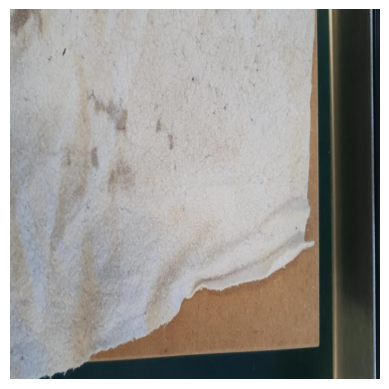

In [6]:
import torch

model = YOLO("/content/runs/detect/train2/weights/best.pt")

results = model("/content/dataset/test/images/20231127_144506_out0003holesstain_jpg.rf.2c4d34c46921ec52843195f6e214b2e8.jpg", save=True, conf=0.5)

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/dataset/test/images/20231127_144506_out0003holesstain_jpg.rf.2c4d34c46921ec52843195f6e214b2e8.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

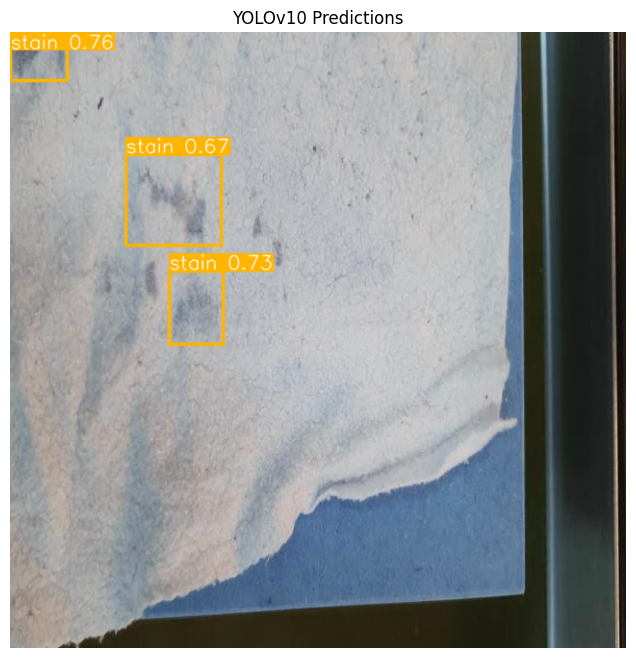

In [7]:
# Get the image with bounding boxes drawn
res_plotted = results[0].plot()

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(res_plotted)
plt.axis("off")
plt.title("YOLOv10 Predictions")
plt.show()

In [8]:
# Run validation on the test set
metrics = model.val(data="/content/dataset/data.yaml", split="test")

# Print the evaluation results
print(metrics)  # This will display mAP, precision, recall, and other metrics

Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40442MiB)


val: Scanning /content/dataset/test/labels... 42 images, 0 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 1200.46it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all         42         92      0.787      0.933      0.952      0.606
            broken-end          4          4      0.585          1      0.945      0.656
          coffee-stain          3          3          1          1      0.995      0.863
           double-ends          3          3      0.576          1      0.995      0.596
          double-picks         14         14      0.672      0.643      0.727       0.33
                  hole          1          1          1          1      0.995      0.895
         missing-picks         12         24      0.956      0.909      0.928        0.4
             oil-stain          1          1      0.398          1      0.995      0.597
             pin-marks         10         10      0.991          1      0.995      0.581
             slip-knot          2          2      0.771          1      0.995      0.752
                 stain          3         13      0.918      0.862       0.94       0.55
            thread-ou